# INTERVALOS
#### k = [2.85, 4.262]
#### q = [1.625, 5.85]
#### x = ((-q)^1/3, 4)
#### y = (0, 7)

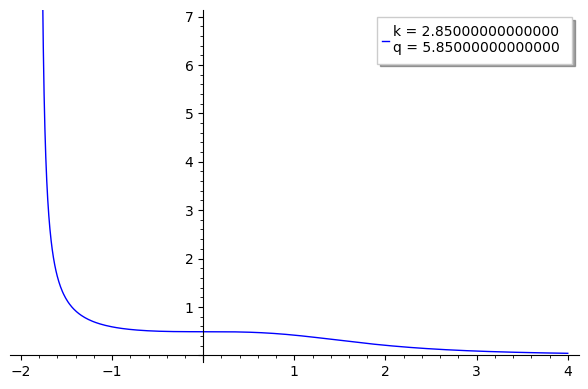

In [184]:
k  = 2.85
q = 5.85
f = ((k)/(x^(3)+q))
g = plot(f, -q^(1/3), 4, legend_label = f'k = {k} \nq = {q}')
g.show(xmin = -2, xmax = 4, ymin = 0, ymax = 7)

# Limitacion do Erro

In [279]:
# f = funcion
# a, b = intervalo
# n = número de subintervalos
def interpola(f, a, b, n):
    # abscisas
    t = [a,a+(b-a)/n..b] #n subintervalos, n+1 nodos
    # o primeiro elemento e no que hai asintota
    # para evitar erros, sumamoslle 0.05
    t[0] += 0.05
    
    # redondeamos a dous decimales as abscisas
    # para evitar erros maquina
    t = [round(i, 2) for i in t]
    
    # zip crea unha tupla de t(abscisas) e as ordenadas
    nodes = list(zip(t, map(f,t)))
    # R digamos que se establece como un elemento de tipo polinómico (como se fose un int)
    R = PolynomialRing(RDF, 'x')
    # p convertese nun polinomio de lagrange cos datos dos nodos
    p = R.lagrange_polynomial(nodes)
    g1 = plot(f, a, max(t), color='blue', legend_label='funcion')
    g2 = plot(p, min(t), max(t), color='green', legend_label= f'polinomio \nnodos: {n}')
    show(g1+g2, xmin = a, xmax = 4, ymin = 0, ymax = 7)
    return p



k: 2.85000000000000, q: 4.26200000000000


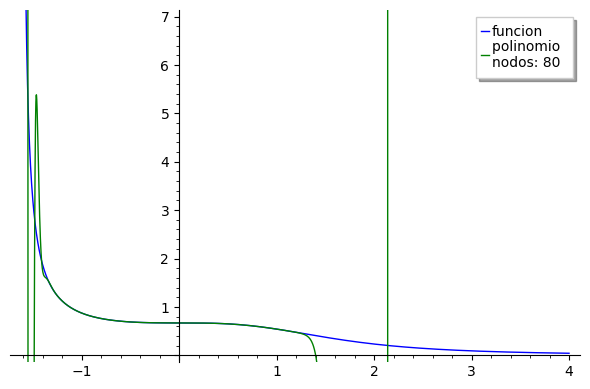

Epsilon: 2.220446049250313e-16
-1.3723235448954304e-20*x^80 + 1.3062795048569339e-18*x^79 - 5.989846602279493e-17*x^78 + 1.760515581760068e-15*x^77 - 3.7223764549953574e-14*x^76 + 6.022195470888026e-13*x^75 - 7.739075102481784e-12*x^74 + 8.091483821218055e-11*x^73 - 6.988840470209269e-10*x^72 + 5.03038816566096e-09*x^71 - 3.0254160121952626e-08*x^70 + 1.5138265760592137e-07*x^69 - 6.207657954448166e-07*x^68 + 2.0100771136230723e-06*x^67 - 4.6382714701536215e-06*x^66 + 4.5341609296873695e-06*x^65 + 1.853854668894115e-05*x^64 - 0.00011453247549558851*x^63 + 0.0003206322495383794*x^62 - 0.00042456275154713027*x^61 - 0.0004954678477828575*x^60 + 0.003975829253636474*x^59 - 0.009331867090745969*x^58 + 0.006990618598029009*x^57 + 0.023476534666951515*x^56 - 0.0874283155078532*x^55 + 0.11287458748419414*x^54 + 0.06826026519893985*x^53 - 0.5229420232690223*x^52 + 0.8105763560369399*x^51 + 0.03487175840318946*x^50 - 2.285932484206055*x^49 + 3.7038363540861248*x^48 - 0.3477316508512027*x^47 - 7.

In [327]:
k  = 2.85
q = 4.262
print(f"\n\nk: {k}, q: {q}")
p = interpola(lambda x: k/(x^3 + q), -q^(1/3), 4, 80)
print(f"Epsilon: {RDF.epsilon()}")
print(p)

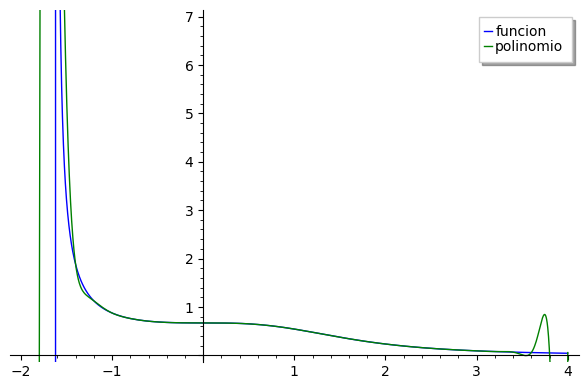

O valor de epsilon (erro de máquina) é: 2.220446049250313e-16
2.0365920989141818e-08*x^30 - 6.642566881564532e-07*x^29 + 9.53354017508876e-06*x^28 - 7.765950031663146e-05*x^27 + 0.000378384278394271*x^26 - 0.0009792069001699237*x^25 + 7.841763627447918e-05*x^24 + 0.00857416749552672*x^23 - 0.027000189103722982*x^22 + 0.019411722149195634*x^21 + 0.08914524502477458*x^20 - 0.25085455114687816*x^19 + 0.11848765880218781*x^18 + 0.5320584005995824*x^17 - 0.9503919315937721*x^16 + 0.015151693239986885*x^15 + 1.519281959619129*x^14 - 1.2994456580774456*x^13 - 0.7129285673910379*x^12 + 1.6176198420210381*x^11 - 0.3717780137162402*x^10 - 0.7660926547167447*x^9 + 0.4729231471808365*x^8 + 0.10351054577728366*x^7 - 0.1158825493319291*x^6 + 0.015568561705092021*x^5 + 0.017103975178331066*x^4 - 0.16060191209253682*x^3 - 0.00046909389949378877*x^2 + 0.00011839273849822973*x + 0.6687001407779039


In [22]:
# cando se incrementa moito n e non presente fenomeno de rouge
# esto xa non é o polinomio de interpolacion
# hai errores numéricos que fan que a frabicación do polinomio sexa errónea
# observase que os valor de polinomio son moito inferiores a epsilon

p = interpola(lambda x: k/(x^3 + q), -2, 4, 30)
print(f"O valor de epsilon (erro de máquina) é: {RDF.epsilon()}")
print(p)

# erro máquina a partir de 50 subintervalos

# Interpolacion Global



 	NODOS: 9


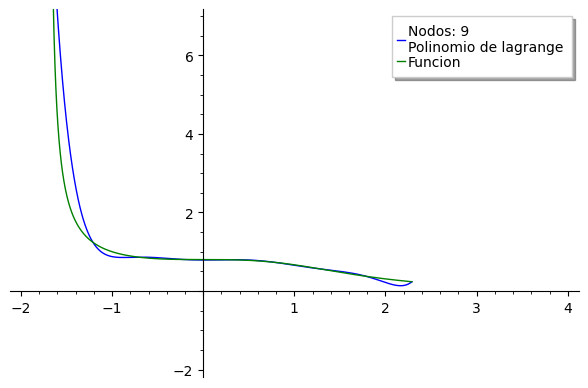

In [318]:
# Interpolacion Global
k = 4
q = 5
abscisas = [-q^(1/3) + i for i in [0, 0.5..4]]
abscisas[0] += 0.05
print(f"\n\n \tNODOS: {len(abscisas)}")
abscisas = [round(i, 2) for i in abscisas]
nodes = list(zip(abscisas, map(lambda x: k/(x^3 + q),abscisas))) # nodos de interpolacion

R = PolynomialRing(RDF, 'x')        # polinomios sobre RDF
f = R.lagrange_polynomial(nodes)    # pol. de interpolacion
g1 = plot(f, -q^(1/3), max(abscisas), color='blue', legend_label = f'Nodos: {len(abscisas)}\nPolinomio de lagrange')
g2 = plot(lambda x: k/(x^3 + q), min(abscisas), max(abscisas), color='green', legend_label='Funcion')
show(g1+g2, xmin = -2, xmax = 4, ymin = -2, ymax = 7)

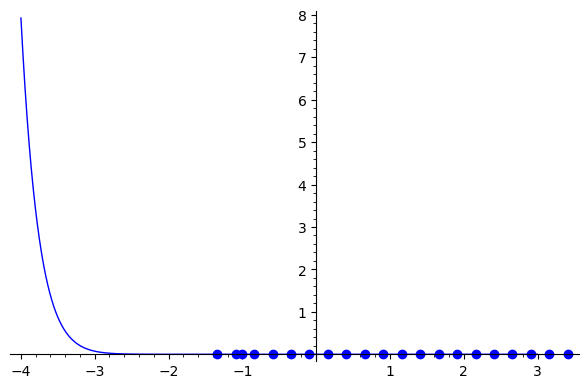

In [292]:
k = 3
q = 4
abscisas = [-q^(1/3) + i for i in [0, 0.25..5] ]
abscisas = [round(i, 2) for i in abscisas]
abscisas[0] = ceil(-q^(1/3))
nodes = list(zip(abscisas, map(lambda x: k/(x^3 + q),abscisas))) # nodos de interpolacion
R = PolynomialRing(RDF, 'x')        # polinomios sobre RDF
f = R.lagrange_polynomial(nodes)    # pol. de interpolacion
# -0.2738095238095238*x^3 - 0.13095238095238104*x^2 + 1.8571428571428572*x + 1.0
P = plot(f,-4,3)
Q = line(nodes, marker='o', linestyle="") 
show(P+Q)

In [296]:
abscisas = [-q^(1/3) + i for i in [0, 0.25..5] ]
len(abscisas)
line2d?

# Interpolacion a cachos

NODOS: 51


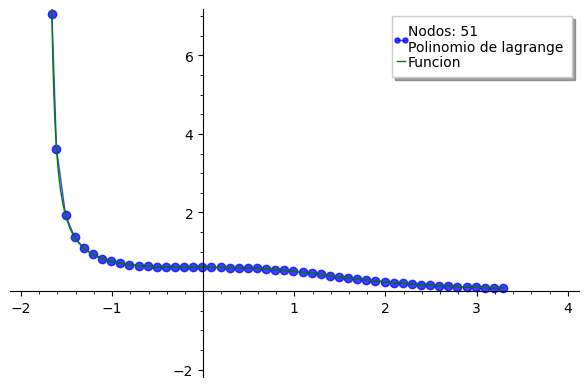

In [322]:
k = 3
q = 5
abscisas = [-q^(1/3) + i for i in [0, 0.1..5]]
abscisas = [round(i, 2) for i in abscisas]
abscisas[0] += 0.05
print(f"NODOS: {len(abscisas)}")
nodes = list(zip(abscisas, map(lambda x: k/(x^3 + q),abscisas)))
g1 = plot(line(nodes, marker='o', alpha = 0.75, legend_label=f'Nodos: {len(abscisas)}\nPolinomio de lagrange'))
g2 = plot(lambda x: k/(x^3 + q), -q^(1/3), max(abscisas), color='green', legend_label='Funcion')
show(g1 + g2, xmin = -2, xmax = 4, ymin = -2, ymax = 7)

# Interpolacion a cachos splines cubicos

NODOS: 51
verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 25 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(4.0)'


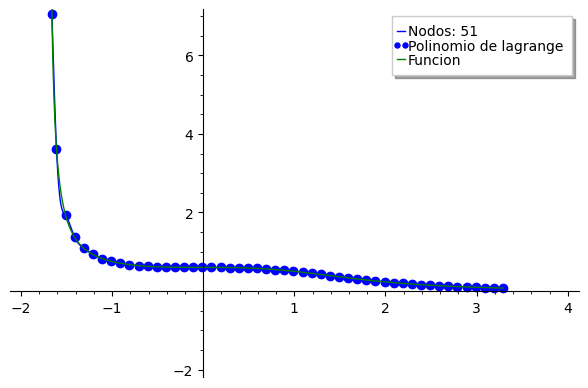

In [324]:
abscisas = [-q^(1/3) + i for i in [0, 0.1..5]]
abscisas = [round(i, 2) for i in abscisas]
abscisas[0] += 0.05
print(f"NODOS: {len(abscisas)}")
nodes = list(zip(abscisas, map(lambda x: k/(x^3 + q),abscisas)))

g1 = plot(spline(nodes), min(abscisas), 4, legend_label = f'Nodos: {len(abscisas)}')
g2 = plot(line(nodes, marker='o', linestyle = "", legend_label='Polinomio de lagrange'))
g3 = plot(lambda x: k/(x^3 + q), -q^(1/3), max(abscisas), color='green', legend_label='Funcion')
show(g1 + g2 + g3, xmin = -2, xmax = 4, ymin = -2, ymax = 7)